In [1]:
import numpy as np
import pandas as pd
from importer_snippets import load_experiment
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
plt.style.use('JGW')
import os
os.getcwd()

'C:\\Users\\jgage\\Documents\\GitHub\\CHEM274'

# Nyquist and Bode Plots

In [5]:
EIS = load_experiment()

In [ ]:
# Nyquist
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Nyquist Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(EIS.data['Zre'], -EIS.data['Zim'], label = 'data')
ax.set_xlabel('$Z_{re}$ / $\Omega$')
ax.set_ylabel('-$Z_{im}$ / $\Omega$')
if (max(EIS.data['Zre']) >= max(-EIS.data['Zim'])):
    axes_max = max(EIS.data['Zre'])
else:
    axes_max = max(-EIS.data['Zim'])
ax.set_xlim ([0,1.1*axes_max])
ax.set_ylim ([0,1.1*axes_max])

In [ ]:
# Bode
Z_mag = np.sqrt(EIS.data['Zre']**2 * EIS.data['Zim']**2)
log_Z_mag = np.log10(Z_mag)
phi = np.arctan(EIS.data['Zim'] / EIS.data['Zre']) * 180 / np.pi # phase angle in degrees
log_omega = np.log10(EIS.data['f'])


fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Bode Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.plot(log_omega, log_Z_mag, label = 'Impedance')
ax.set_ylabel('log$|Z|$', color='C0')
ax.set_xlabel('log$\omega$')

ax2 = ax.twinx()
ax2.plot(log_omega, phi, label = 'Phase', color='C1')
ax2.set_ylabel('$\phi$ / degrees', color='C1')
plt.grid()

# Cyclic Voltammograms

In [2]:
CV = load_experiment()

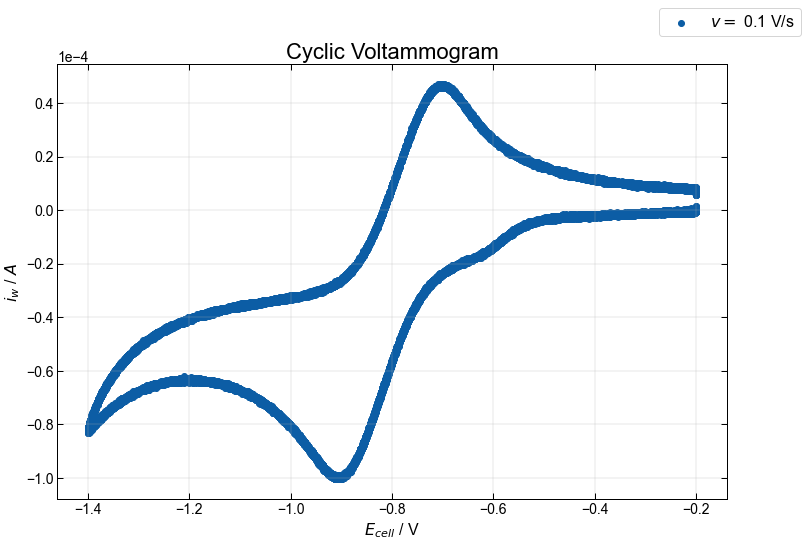

In [3]:
# CV
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.legend()

### Find CV Peaks

In [16]:
# Maxima
find_ipa = find_peaks(CV.data['iw'], threshold=0, height=0) # Must give minimum height to get peak_heights dict.
print(find_ipa)
ipa, Epa = CV.data['iw'][find_ipa[0]].item(), CV.data['Ecell'][find_ipa[0]].item()
print(ipa, Epa)

# Invert signal to find minima - Signals are negative but indicies are correct!
find_ipc = find_peaks(-CV.data['iw'], threshold=0, height=0) # Remember to un-invert anytime you call ipc values, but not indicies.
ipc, Epc = CV.data['iw'][find_ipc[0]].item(), CV.data['Ecell'][find_ipc[0]].item()
print(ipc, Epc)

(array([], dtype=int64), {'peak_heights': array([], dtype=float64), 'left_thresholds': array([], dtype=float64), 'right_thresholds': array([], dtype=float64), 'prominences': array([], dtype=float64), 'left_bases': array([], dtype=int64), 'right_bases': array([], dtype=int64)})


ValueError: can only convert an array of size 1 to a Python scalar

#### Plotting with peaks, saving

In [17]:
def save_CV_fig(analyte, solvent, electrode, notebook):
    ans = input('Save the figure?')
    if ans or ans in ['y', 'yes', 'Yes', 'yeye', 'yeah', 'why, certainly']:
        plt.savefig("C:\\Users\\jgage\\Documents\\GitHub\\CHEM274\\data\\figs\\"+
            analyte + solvent + electrode +
            str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + 'Vs-1_'+
                   notebook)
        return 'Saved'
    else:
        return 'Not saved'

Save the figure? n


ValueError: Format '1vs-1__p-00-00' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

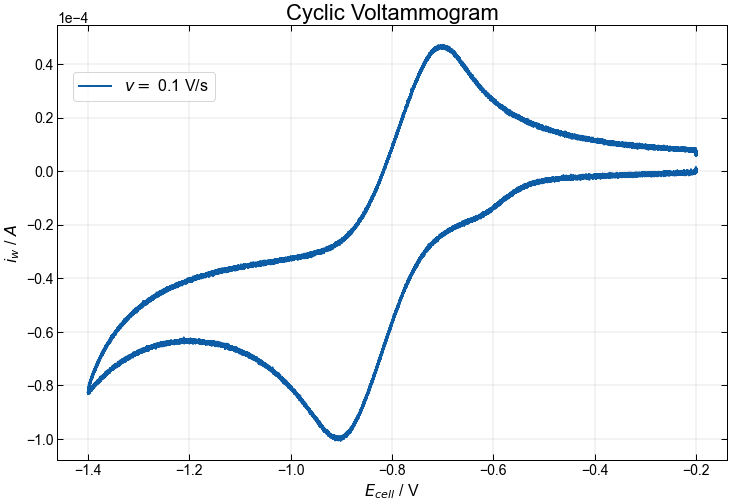

In [18]:
# Draw same plot as above, but with peaks
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.plot(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.loc[CV.params['parameter']=='scan_rate', 'value'].item()) + ' V/s')
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# ax.scatter([Epa, Epc], [ipa, ipc], color='C1', label = 'Peaks', marker='|')
fig.legend(loc=(0.1, 0.8))

analyte = 'Fc_'
solvent = 'MeCN_'
electrode = 'GC_'
notebook = '_P-00-00'
save_CV_fig(analyte, solvent, electrode, notebook)